В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
#from xgboost import XGBRegressor, XGBClassifier
#from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
#from sklearn.model_selection import StratifiedKFold
#from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

In [2]:
#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
data = pd.read_csv('heart.csv')

Данные:
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]

EDA и визуализация

In [5]:
# проверяем на пропуски
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [8]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [9]:
# смотрим статистику
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [10]:
# категориальные переменные
data.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


HeartDisease
1    508
0    410
Name: count, dtype: int64


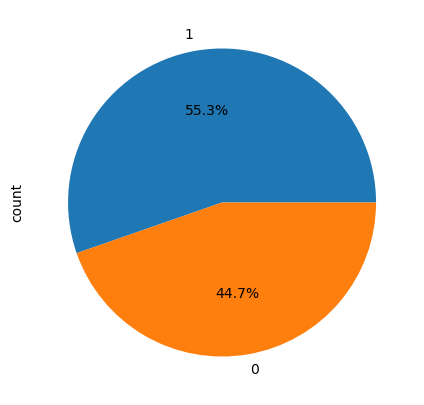

In [11]:
# смотрим целевую переменную - почти 50 на 50
print(data["HeartDisease"].value_counts())
data["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(5,5));

In [12]:
numerical= data.drop(['HeartDisease'], axis=1).select_dtypes('number').columns
categorical = data.select_dtypes('object').columns

In [13]:
# смотрим распределение цифровых данных 
data[numerical].iplot(kind='histogram', subplots=True,bins=50)

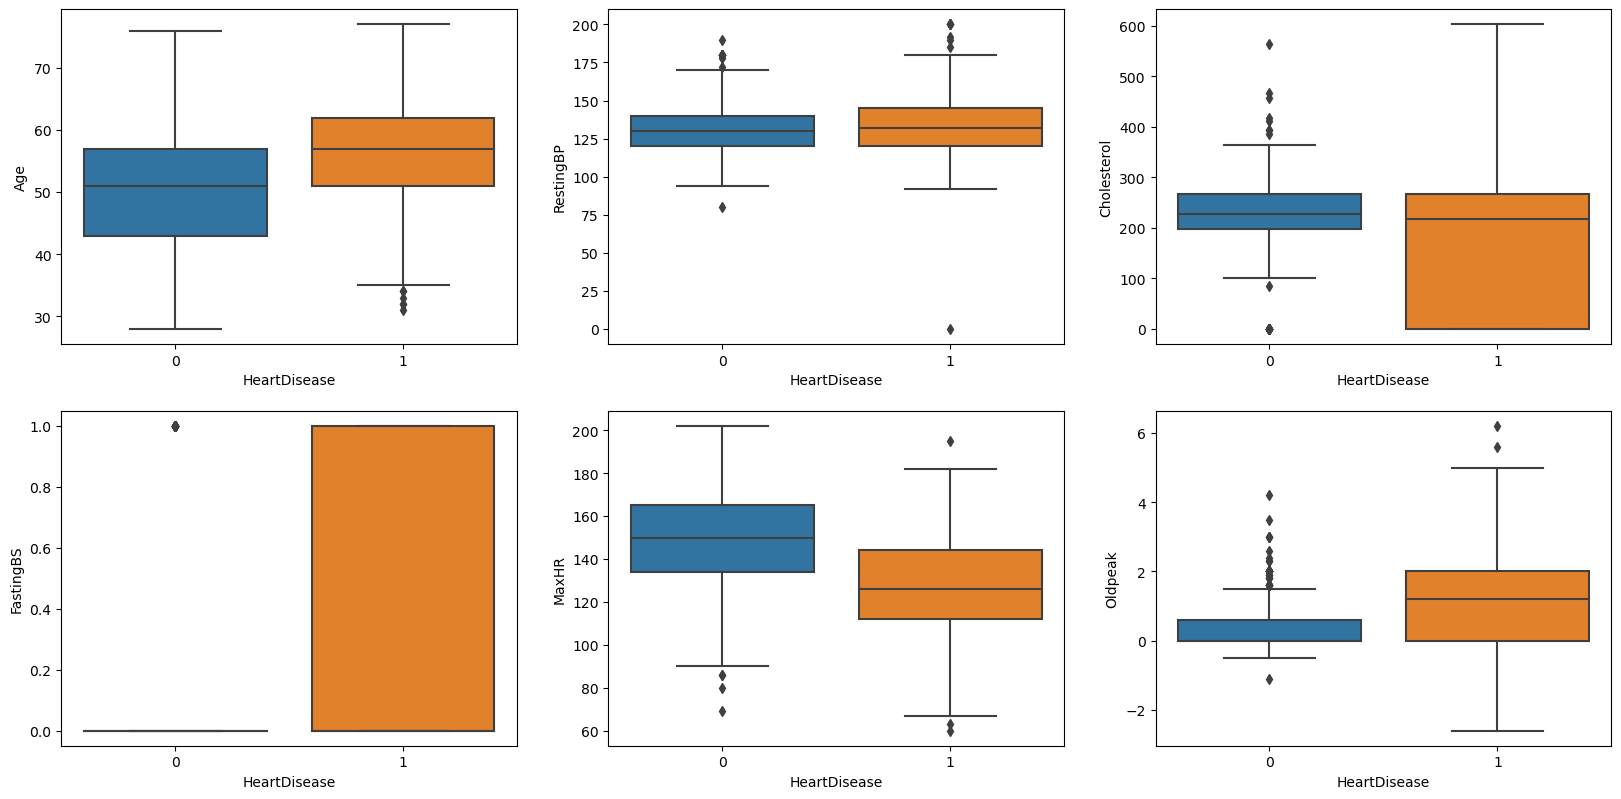

In [14]:
index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    index += 1
    plt.subplot(4, 3, index)
    sns.boxplot(x='HeartDisease', y=feature, data=data)

<Axes: >

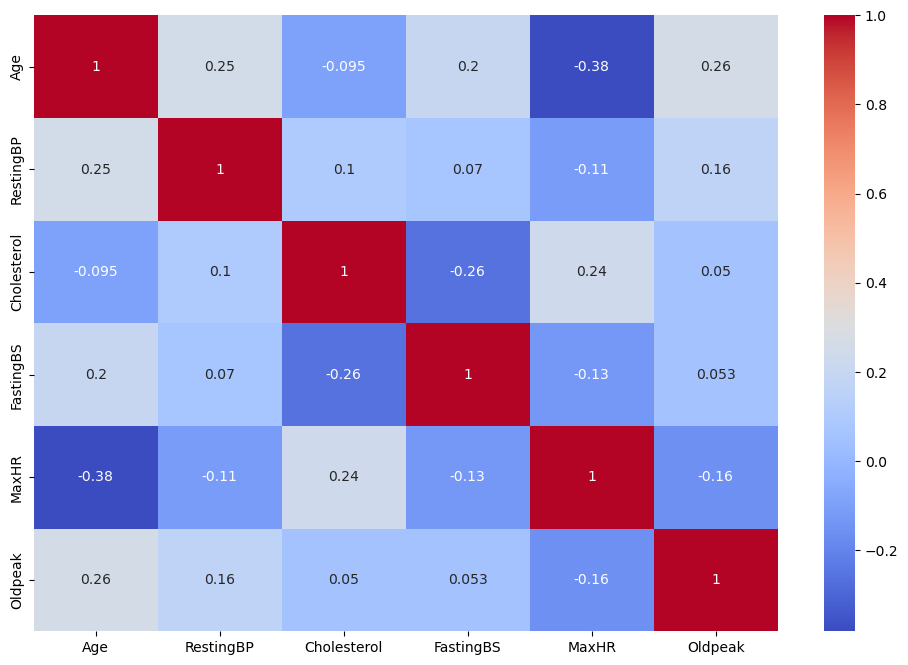

In [15]:
# перед переходом моделям посмотрим на корреляцию - нет явной корреляции между переменными
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical].corr(), annot=True, cmap= 'coolwarm')

In [16]:
# переходим к категориальным переменным
data[categorical].iplot(kind='histogram',subplots=True,bins=50)

In [17]:
# переделываем категориальные переменные
data = pd.get_dummies(data, drop_first=True)

In [18]:
X = data.loc[:, data.columns != 'HeartDisease']
y = data[['HeartDisease']]

In [19]:
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True


Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier
b) ensemble.RandomForestClassifier

In [20]:
# Разделяем данные на тренировачные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [21]:
# делам функцию для вычислений моделей и метрик
def get_score(random_seed=10, model=None, depth=None ):
    
    if model is None:
        return -1     
    if model == 'DecisionTreeClassifier' and depth is None:
        clf = DecisionTreeClassifier(max_depth=3, random_state=random_seed)
    if model == 'DecisionTreeClassifier' and depth >= 3:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=random_seed)
    if model == 'RandomForestClassifier' and depth is None:
        clf = RandomForestClassifier(max_depth=3, random_state=random_seed)
    if model == 'RandomForestClassifier' and depth >= 3:
        clf = RandomForestClassifier(max_depth=depth, random_state=random_seed)
      
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print (model, ' :')
    print(classification_report(y_test, y_pred))

# Выявляем наиболее важные признаки и выводим на график. Большое значение имеет признак Overall Qual, остальные почти равны нулю
    imp = pd.Series(clf.feature_importances_)
    imp.index = pd.Series(X_train.columns)
    imp = imp.sort_values(ascending=False)
    plt.figure(figsize=(7, 5))
    plt.title('Top 5 feature importances')
    plt.xlabel('Features')
    plt.ylabel('Gini')
    plt.bar(imp.head().index, imp.head())
    plt.show()
    return 

DecisionTreeClassifier  :
              precision    recall  f1-score   support

           0       0.75      0.76      0.75        86
           1       0.78      0.78      0.78        98

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



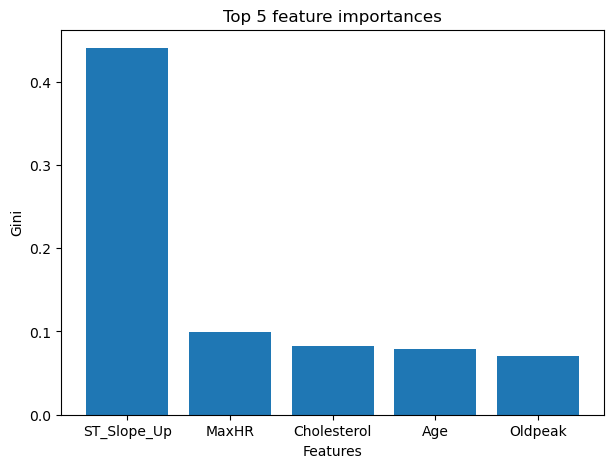

In [22]:
get_score(model='DecisionTreeClassifier', depth=9)

RandomForestClassifier  :
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        86
           1       0.84      0.87      0.85        98

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



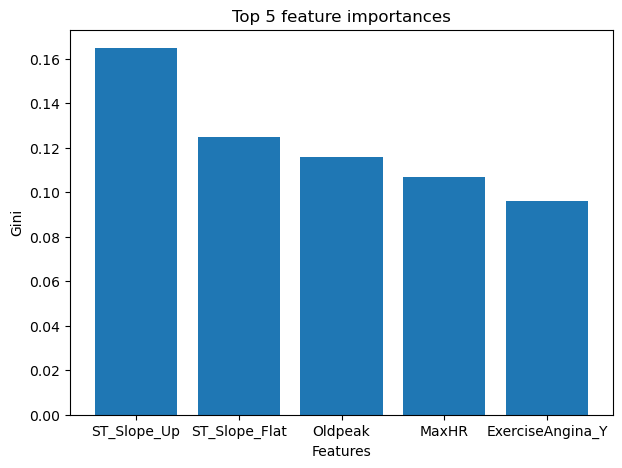

In [23]:
get_score(model='RandomForestClassifier', depth=9)

Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
a) Повторите п. 5

In [24]:
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200, random_state=10)
#bag = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=200, random_state=10)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print ('BaggingClassifier:')
print(classification_report(y_test, y_pred))


BaggingClassifier:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        86
           1       0.83      0.87      0.85        98

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.

In [25]:
# делаем стайкинг
clf = DecisionTreeClassifier(max_depth=8, random_state=10)
rfc = RandomForestClassifier(max_depth=8, random_state=10)
lsvc = LinearSVC(random_state=10)
ensemble = StackingClassifier(estimators=[('DecisionTreeClassifier', clf), ('RandomForestClassifier', rfc), ('LinearSVC', lsvc)], final_estimator=LinearSVC())

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)
print ('StackingClassifier:')
print(classification_report(y_test, y_pred))
#print (ensemble.score(X_train, y_train), ensemble.score(X_test, y_test))


StackingClassifier:
              precision    recall  f1-score   support

           0       0.87      0.80      0.84        86
           1       0.84      0.90      0.87        98

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [26]:
for i in ensemble.named_estimators:
    print(f'Score on train  with model {i} { ensemble.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} { ensemble.named_estimators_[i].score(X_test, y_test)}')

Score on train  with model DecisionTreeClassifier 0.9509536784741145
Score on test  with model DecisionTreeClassifier 0.7717391304347826
Score on train  with model RandomForestClassifier 0.9536784741144414
Score on test  with model RandomForestClassifier 0.8586956521739131
Score on train  with model LinearSVC 0.6444141689373297
Score on test  with model LinearSVC 0.6032608695652174


RandomForestClassifier - фаворит по точности классификации, LinearSVC - худшие результаты. Лучший результат удалось получить в стайкинге, используя в финальном алгоритме LinearSVC

давайте все немного переделаем
1. проведем нормализацию данных
2. воспользуемся доступными инструментами оптимизации и пересмтроим одну из моделей

In [27]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [28]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, 3, 5, 7],
              "max_depth": [None, 4, 5, 6, 7, 8, 9, 10],
              "min_samples_leaf": [2, 3, 5],
              "min_samples_split": [2, 3, 5, 7, 9, 15]}

In [30]:
# GridSearchCV инструмент для автоматического подбирания параметров для моделей машинного обучения
DT_grid_model = DecisionTreeClassifier(class_weight = "balanced", random_state=10)

DT_grid_model = GridSearchCV(estimator=DT_grid_model,
                            param_grid=param_grid,
                            scoring='recall',
                            n_jobs = -1, verbose = 2).fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


In [31]:
print('Best Parameters of GridSearchCV for Decision Tree Model: ', DT_grid_model.best_params_)
print()
print('Best Estimator of GridSearchCV for Decision Tree Model: ', DT_grid_model.best_estimator_)

Best Parameters of GridSearchCV for Decision Tree Model:  {'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 9, 'splitter': 'random'}

Best Estimator of GridSearchCV for Decision Tree Model:  DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_features=5,
                       min_samples_leaf=3, min_samples_split=9, random_state=10,
                       splitter='random')


In [32]:
DT_grid_model.fit(X_train_scaled, y_train)
y_pred = DT_grid_model.predict(X_test_scaled)

y_train_pred = DT_grid_model.predict(X_train_scaled)

dt_grid_f1 = f1_score(y_test, y_pred)
dt_grid_acc = accuracy_score(y_test, y_pred)
dt_grid_recall = recall_score(y_test, y_pred)
dt_grid_auc = roc_auc_score(y_test, y_pred)
print('оптимизированный результат')
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
оптимизированный результат
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        86
           1       0.84      0.88      0.86        98

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



DecisionTreeClassifier  :
              precision    recall  f1-score   support

           0       0.75      0.76      0.75        86
           1       0.78      0.78      0.78        98

    accuracy                           0.77       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.77      0.77      0.77       184



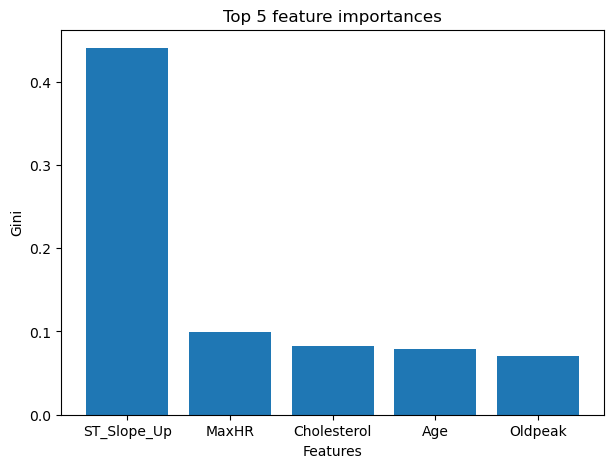

In [33]:
get_score(model='DecisionTreeClassifier', depth=9)

в оптимизированной модели accuracy 85% против 77% в базовой модели 